In [1]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logs

model_path = 'C:/Users/Maelstorm/Gesture-Controlled-PC/models/Model11_29_03_04.h5'
model = tf.keras.models.load_model(model_path)

model.summary()


KeyboardInterrupt: 

KeyboardInterrupt: 

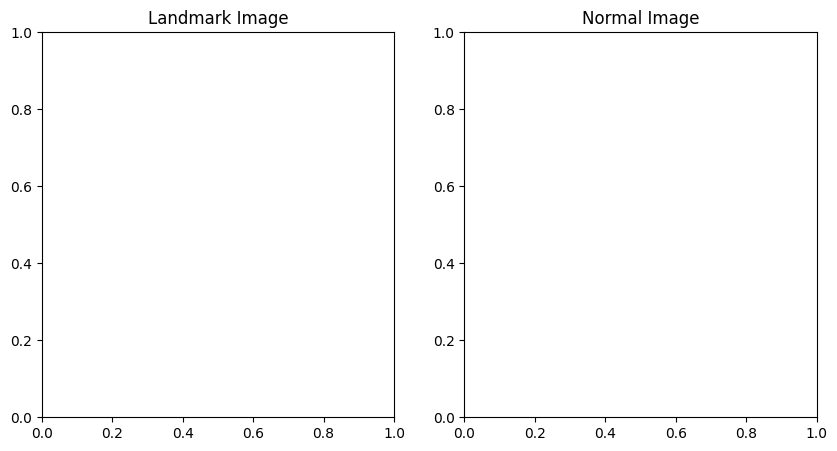

: 

In [ ]:
import cv2
import mediapipe as mp
import time
import numpy as np
import matplotlib.pyplot as plt
# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_draw = mp.solutions.drawing_utils
frame_counter=0
kernel = np.array([0, -1, 0, -1, 5, -1, 0, -1, 0]).reshape((3, 3))
cap = cv2.VideoCapture(0)
last_time=time.time()

plt.ion()  # Interactive mode ON
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Two subplots side by side
ax1.set_title("Landmark Image")
ax2.set_title("Normal Image")
while cap.isOpened():

    success, frame = cap.read()
    if not success:
        print("Ignoring empty frame.")
        continue

    # Flip the frame horizontally and convert the BGR image to RGB
    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with Mediapipe Hands
    results = hands.process(rgb_frame)
    
    if results.multi_hand_landmarks:
        current_time = time.time()
        if current_time - last_time >= 0.5:
            last_time = current_time
            for hand_landmarks in results.multi_hand_landmarks:
                all_points_coordinates = []
             
                black_canvas = frame.copy()
                black_canvas[:, :] = 0  # Set all pixels to black

                for idx, landmark in enumerate(hand_landmarks.landmark):
                    x = int(landmark.x * frame.shape[1])
                    y = int(landmark.y * frame.shape[0])
                    all_points_coordinates.append((x, y))
                    cv2.circle(black_canvas, (x, y), 2, (0, 255, 0), -1)  # Reduced circle size
                
                x_min = min([point[0] for point in all_points_coordinates])-10
                x_max = max([point[0] for point in all_points_coordinates])+10
                y_min = min([point[1] for point in all_points_coordinates])-10
                y_max = max([point[1] for point in all_points_coordinates])+35
 
                cropped_img = frame[y_min:y_max, x_min:x_max]
                cropped_img = cv2.resize(cropped_img, (50, 50))
                cropped_img = cv2.filter2D(cropped_img, -1, kernel)
                cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
               
                ld_cropped_img = black_canvas[y_min:y_max, x_min:x_max]
                ld_cropped_img = cv2.resize(ld_cropped_img, (50, 50))
                ld_cropped_img = cv2.cvtColor(ld_cropped_img, cv2.COLOR_BGR2GRAY)
                
                combined_input = [np.array([cropped_img,]),np.array([ld_cropped_img,])]        
                prediction = model.predict(combined_input,verbose=0)
                max_index = np.argmax(prediction)
                print(f"Prediction index with maximum value: {max_index}",end='\r')
                
                # ax1.clear()  # Clear the previous frame's plot
                # ax2.clear()  # Clear the previous frame's plot
                # ax1.imshow(ld_cropped_img, cmap='gray')  # Display landmark image
                # ax2.imshow(cropped_img, cmap='gray')  # Display normal image
                # ax1.set_title("Landmark Image")
                # ax2.set_title("Normal Image")
                
                frame_counter += 1
                mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                # plt.draw()
                # plt.pause(0.01)
                # plt.show()
    # Display the frame without point names
    cv2.imshow("Hand Tracking", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
cv2.destroyAllWindows()

: 